# Pymaceuticals Inc.
---

### Analysis


• There is a positive correlation between mouse weight and average tumor volume As the mouse weight increases, the average tumor volume increases too.

• Capomulin and Ramicane had the most number of mice tested.

• Capomulin and Ramicane reduces the tumor size better.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
count=df["Mouse ID"].nunique()
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate =df[df[["Mouse ID","Timepoint"]].duplicated(keep=False)]
duplicate_ID=duplicate["Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"]==duplicate_ID[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != duplicate_ID[0]]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_variance=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_stddev=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_sem=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics=pd.DataFrame({  "Tumor Volume Mean":Tumor_mean,
                            " Tumor Volume Median":Tumor_median,
                            "Tumor Volume Variance":Tumor_variance,
                            "Tumor Volume Std. Dev":Tumor_stddev,
                            "Tumor Volume Std. Err":Tumor_sem})


statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


statistics2=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])


statistics2 = statistics2.rename(columns={"mean": " Tumor Volume Mean",
                                                  "median": " Tumor Volume Median",
                                                   "var": " Tumor Volume Variance",
                                                   "std":" Tumor Volume Std. Dev", 
                                                   "sem":"Tumor Volume Std.Err "})
statistics2

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

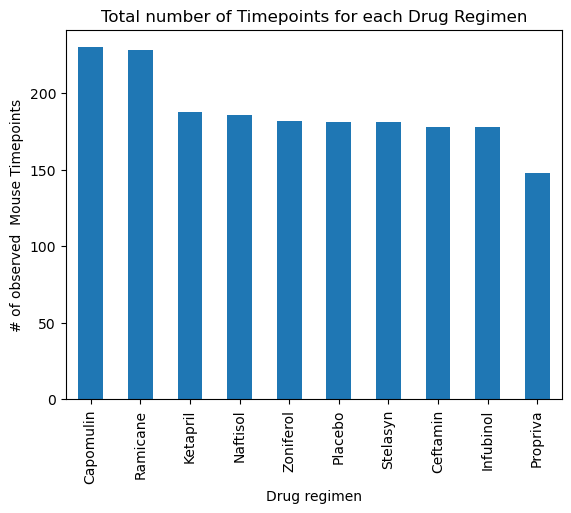

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar=clean_df.groupby("Drug Regimen")["Timepoint"].count()
bar =bar.sort_values(ascending=False)

bar.plot(kind="bar",rot=90)
plt.title("Total number of Timepoints for each Drug Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("# of observed  Mouse Timepoints")
plt.show()

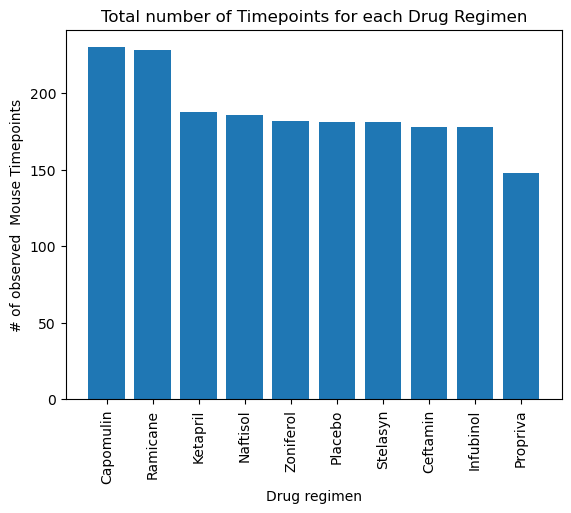

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar.index,bar.values)
plt.title("Total number of Timepoints for each Drug Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("# of observed  Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

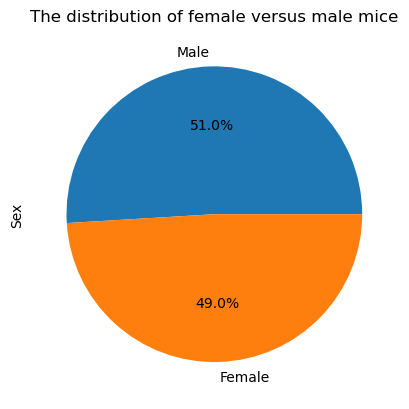

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie =clean_df["Sex"].value_counts()
pie.plot(kind="pie",label="Sex",autopct="%1.1f%%")
plt.title("The distribution of female versus male mice")
plt.show()

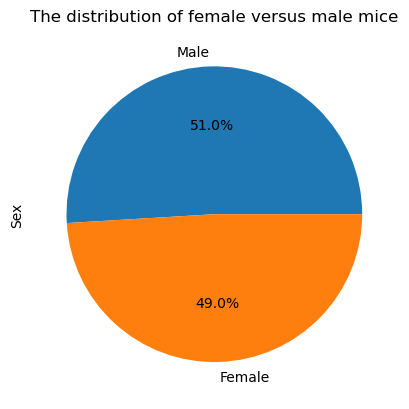

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie.values, labels=pie.index,autopct="%1.1f%%")
plt.title("The distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tp=clean_df.groupby("Mouse ID")["Timepoint"].max()
tp
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxplt=pd.merge(tp,clean_df ,on=["Mouse ID","Timepoint"], how="inner",left_index=False,right_index=False)
boxplt



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for drug in treatments:
    tumor= boxplt.loc[boxplt["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append( tumor)
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers = tumor[(tumor < lower_bound) | (tumor >upper_bound)]
    print(f"{drug}'s Potential Outliers {outliers}")

   

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's Potential Outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


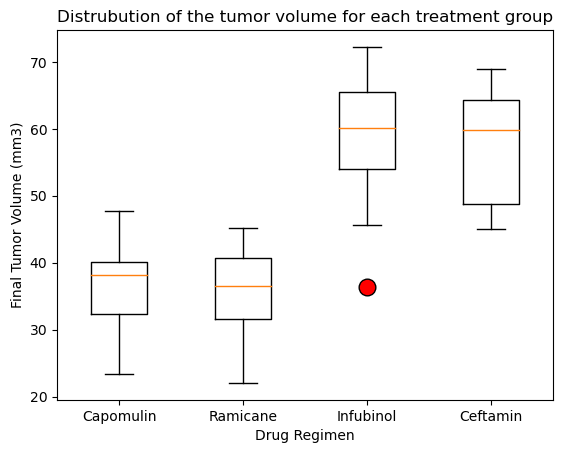

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops=flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')
ax.boxplot(tumor_vol,flierprops=flierprops)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Distrubution of the tumor volume for each treatment group")
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

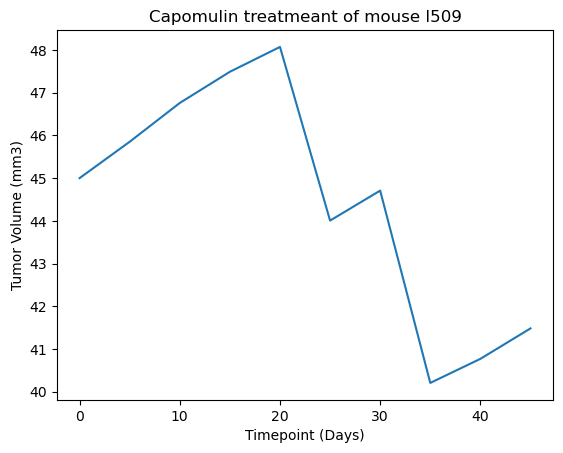

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]=="l509" )]
timepoint=line["Timepoint"]
tumorvolume=line["Tumor Volume (mm3)"]
plt.plot(timepoint,tumorvolume)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()

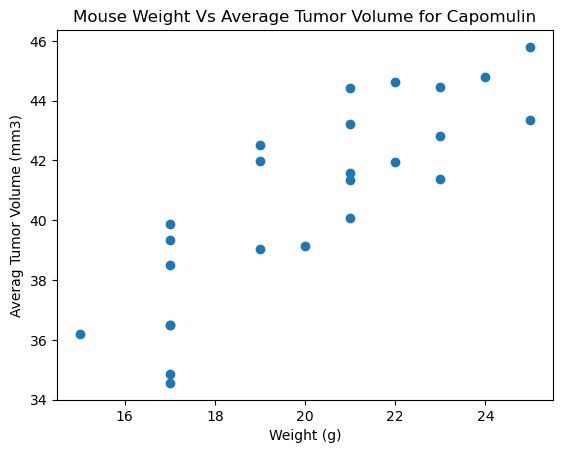

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]
avg_tumorvol=scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight=scatter.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(weight,avg_tumorvol)
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()   

## Correlation and Regression

The correlation between mouse weight and average tumor volume  is 0.84
The r-squared is: 0.709


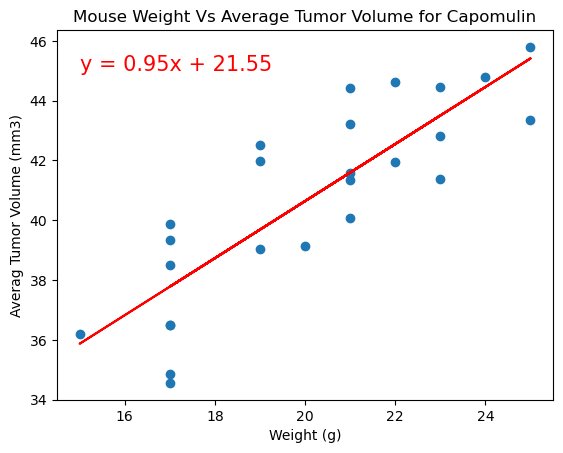

In [28]:
from scipy.stats import linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correl=st.pearsonr(weight,avg_tumorvol)
corcoeff=round(correl[0],2)
print(f"The correlation between mouse weight and average tumor volume  is {corcoeff}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avg_tumorvol)

regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,avg_tumorvol)
plt.plot(weight,regress_values,color="red")
plt.annotate(line_eq,(15,45),fontsize=15,color="red")
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()